In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from numpy import random
import math
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Let us create a UDF which will enable us to shade areas under the curve for standardnormal distribution

def draw_z_score(x, cond, mu, sigma, title):
    y = stats.norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(z, stats.norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

In [3]:
# Let us create a UDF which will enable us to shade areas under the curve for t-distribution

def draw_t_score(x, df, cond, mu, sigma, title):
    y = stats.t.pdf(x, df, mu, sigma)
    t = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(t, stats.t.pdf(t, df, mu, sigma))
    plt.title(title)
    plt.show()

Exercise 8.1.7
==

A 99.0 % confidence interval for the sample mean is [74.0353 ; 74.0367]


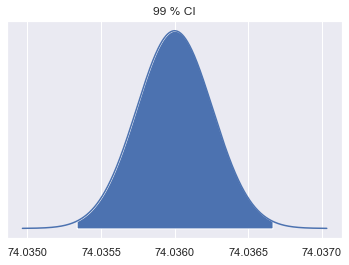

In [4]:
# a)
sigma = 0.001
n = 15
SE = sigma/np.sqrt(n)
mean = 74.036
Level = 0.99

CI = stats.norm.interval(Level, loc=mean, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), mean, SE, '99 % CI')

A 99.0 % lower confidence interval for the sample mean is 74.035399 < μ 


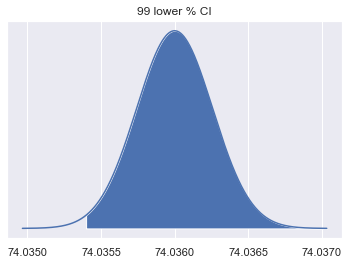

In [5]:
# b)
sigma = 0.001
n = 15
SE = sigma/np.sqrt(15)
mean = 74.036
Level = 0.98 ## Please notice THIS

CI = stats.norm.interval(Level, loc=mean, scale=SE)

print('A ' + repr(Level*100+1) + ' % lower confidence interval for the sample mean is '+ repr(round(CI[0],6)) + ' < \u03bc ')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

draw_z_score(x, CI[0] <= x, mean, SE, '99 lower % CI')

Exercise 8.1.8
==

A 95.0 % confidence interval for the sample mean is [3232.11 ; 3267.89]


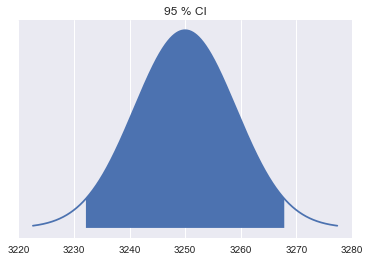

In [6]:
# a)
sigma = np.sqrt(1000)
n = 12
SE = sigma/np.sqrt(n)
mean = 3250
Level = 0.95

CI = stats.norm.interval(Level, loc=mean, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],2)) + ' ; '
      + repr(round(CI[1],2)) + ']')

x = np.linspace(mean-3*SE, mean+3*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), mean, SE, '95 % CI')

A 99.0 % confidence interval for the sample mean is [3226.49 ; 3273.51]


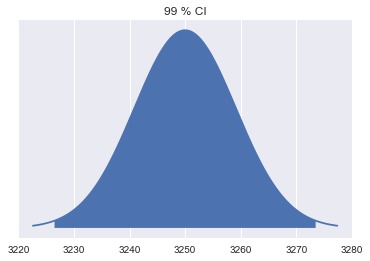

In [7]:
# b)
sigma = np.sqrt(1000)
n = 12
SE = sigma/np.sqrt(n)
mean = 3250
Level = 0.99

CI = stats.norm.interval(Level, loc=mean, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],2)) + ' ; '
      + repr(round(CI[1],2)) + ']')

x = np.linspace(mean-3*SE, mean+3*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), mean, SE, '99 % CI')

Exercise 8.2.10
===

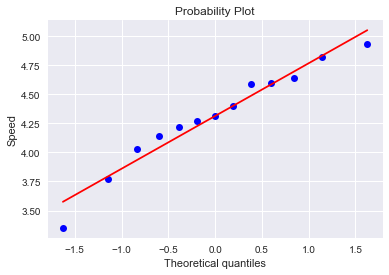

Skewness = -0.6732
Kurtosis = 0.0515


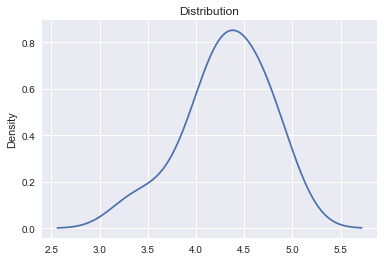

In [30]:
# The damn data is not saved as an excel file

a = [3.7753, 3.350679, 4.217981, 4.030324, 4.639692, 4.139665, 4.395575, 4.824257, 4.268119, 4.584193,
    4.930027, 4.315973, 4.600101]

# a) We check for normality using a normal probability plot and compute skewness and kurtosis and then create a plot of the pdf
stats.probplot(a, plot=plt)
plt.ylabel('Speed')
plt.show()
print('Skewness = ' + repr(round(stats.skew(a),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(a),4)))
df = pd.DataFrame(a)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution');

A 95.0 % confidence interval for the sample mean is [4.052 ; 4.575]


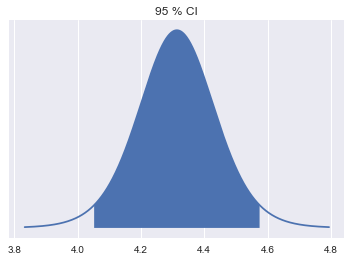

In [37]:
# b)
n = len(a)
SE = stats.sem(a)
mean = np.mean(a)
Level = 0.95 # Please notice THIS

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],3)) + ' ; '
      + repr(round(CI[1],3)) + ']')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

draw_t_score(x, n-1, (CI[0] <= x) & (x <= CI[1]), mean, SE, '95 % CI')

A 95.0 % lower confidence interval for the sample mean is 4.099 < μ 


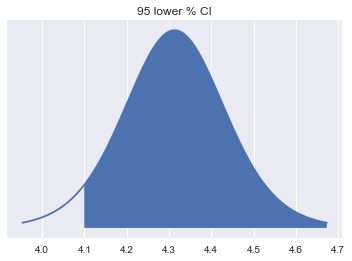

In [39]:
# c)
n = len(a)
SE = stats.sem(a)
mean = np.mean(a)
Level = 0.90 # Please notice THIS

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('A ' + repr(Level*100+5) + ' % lower confidence interval for the sample mean is '+ repr(round(CI[0],3)) + ' < \u03bc ')

x = np.linspace(mean-3*SE, mean+3*SE, 1000)

draw_t_score(x, n-1, CI[0] <= x, mean, SE, '95 lower % CI')

Exercise 8-36
===

A 95.0 % lower confidence interval for the sample mean is 4.023 < μ 


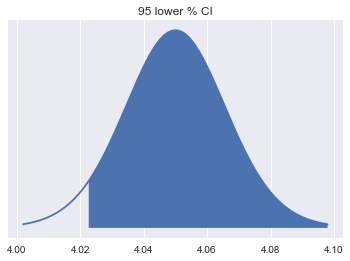

In [41]:
n = 25
mean = 4.05
sigma = 0.08
SE = sigma/np.sqrt(n)
Level = 0.90  # Please notice THIS

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('A ' + repr(Level*100+5) + ' % lower confidence interval for the sample mean is '+ repr(round(CI[0],3)) + ' < \u03bc ')

x = np.linspace(mean-3*SE, mean+3*SE, 1000)

draw_t_score(x, n-1, CI[0] <= x, mean, SE, '95 lower % CI')

Exercise 8.3.5
===

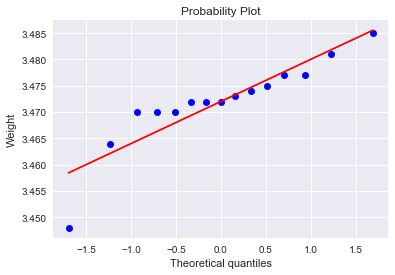

Skewness = -1.4381
Kurtosis = 2.986


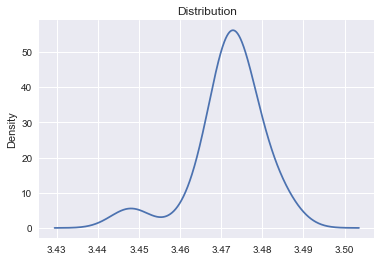

In [63]:
# The damn data is not saved as an excel file

a = [3.481, 3.448, 3.485, 3.475, 3.472, 3.477, 3.472, 3.464, 3.472, 3.470, 3.470, 3.470, 3.477, 3.473, 3.474]

# a) We check for normality using a normal probability plot and compute skewness and kurtosis and then create a plot of the pdf
stats.probplot(a, plot=plt)
plt.ylabel('Weight')
plt.show()
print('Skewness = ' + repr(round(stats.skew(a),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(a),4)))
df = pd.DataFrame(a)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution');

In [64]:
n = len(a)
sigma = np.std(a, ddof=1)
mean = np.mean(a)
Level = 0.05 
chi = stats.chi2.ppf(Level, n-1)

upper = np.sqrt(((n-1)*sigma**2)/chi)

print('A ' + repr(int((1-Level)*100)) + ' % upper confidence interval for the sample standard deviation is '
      + ' \u03c3 < ' + repr(round(upper,3)))

A 95 % upper confidence interval for the sample standard deviation is  σ < 0.012


The data do not appear to be normally distributed based on an examination of the normal probability plot above.  Therefore, the 95% confidence interval for σ is not valid.

Exercises 8.4.1
===

A 95.0 % confidence interval for the sample proportion is [0.5012 ; 0.5717]


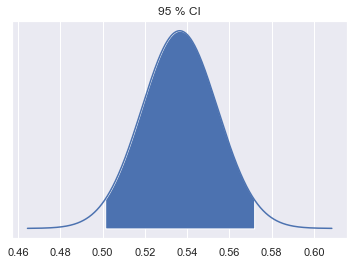

In [5]:
# a)
n1 = 768 
s = 412
p = s/n1
SE = np.sqrt((p*(1-p))/n1)
Level = 0.95

CI = stats.norm.interval(Level, loc=p, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the sample proportion is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(p-4*SE, p+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), p, SE, '95 % CI')

A 90.0 % lower confidence interval for the sample proportion is p > 0.5069


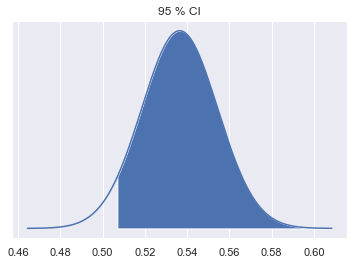

In [8]:
# b)
n1 = 768 
s = 412
p = s/n1
SE = np.sqrt((p*(1-p))/n1)
Level = 0.90

CI = stats.norm.interval(Level, loc=p, scale=SE)

print('A ' + repr(Level*100) + ' % lower confidence interval for the sample proportion is p > ' + repr(round(CI[0],4)))

x = np.linspace(p-4*SE, p+4*SE, 1000)

draw_z_score(x, (CI[0] <= x), p, SE, '95 % CI')